#### This is a worked example on how to set up SQL Server, SQL Server Management Studio, and a ODBC connection with R.

##### Step 1: Install SQL Server from https://www.microsoft.com/en-us/sql-server/sql-server-downloads. The SQL Server 2017 Express was good enough for me to run some analysis and modelling on my own. Once done, you should have a screen like this:

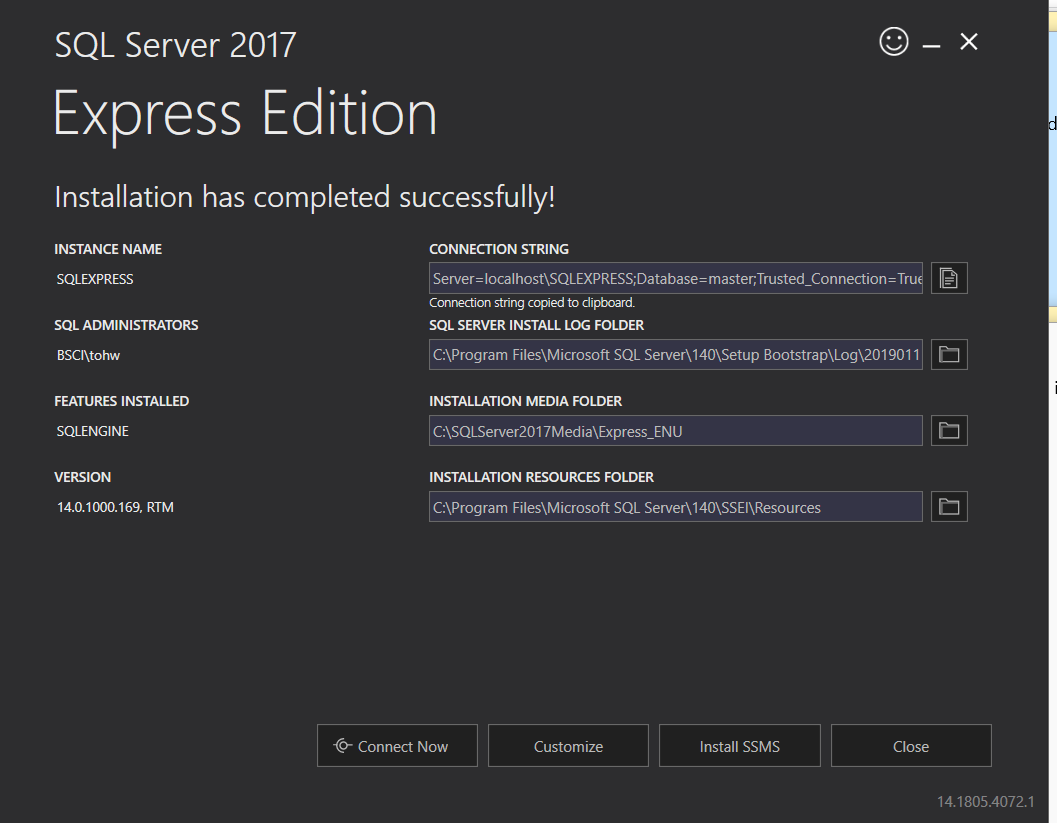

##### Step 2: Click on the "Install SSMS" button. SSMS stands for SQL Server Management Studio. Once done, connect to the server:

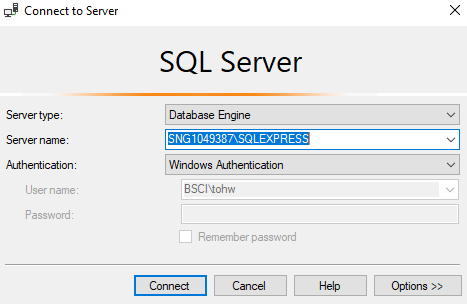

##### Step 3: Create a database on the server. You may follow the steps given in this page as a quick start: https://docs.microsoft.com/en-us/sql/ssms/tutorials/connect-query-sql-server?view=sql-server-2017. If you do, you should have a database created named "TutorialDB" and a table named "Customers".

##### Step 4: Install and load the RODBC package in R.

In [20]:
#install.packages("RODBC")
library(RODBC)

##### Step 5: Connect to the server and the database, and run a sample query.

In [21]:
conn <- odbcDriverConnect('driver={SQL Server};server=SNG1049387\\SQLEXPRESS;database=TutorialDB;trusted_connection=true')
customers <- sqlQuery(conn, 'select * from dbo.Customers')
str(customers)

'data.frame':	4 obs. of  4 variables:
 $ CustomerId: int  1 2 3 4
 $ Name      : Factor w/ 4 levels "Donna","Janet",..: 4 3 1 2
 $ Location  : Factor w/ 4 levels "Australia","Germany",..: 1 3 2 4
 $ Email     : Factor w/ 4 levels "","donna0@adventure-works.com",..: 1 4 2 3


##### Step 6: Write an R data frame into your database.

In [22]:
df <- read.csv("data/adult.csv")
sqlSave(conn, df)

##### Step 7: Refresh the Database node in SMSS to verify if the data frame has been written into the database as a table.

#### You are now ready to use SQL Server, SSMS, and R to run some analysis and modelling.